In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fruits = np.load('fruits_300.npy')
fruits.shape
# 샘플의 개수, 이미지 높이, 이미지 너비 배열의 크기가 100 X 100

(300, 100, 100)

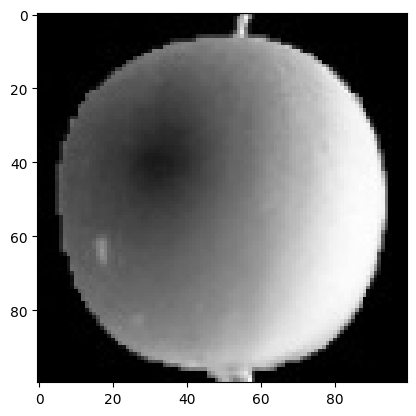

In [4]:
plt.imshow(fruits[0],cmap='gray')
plt.show()

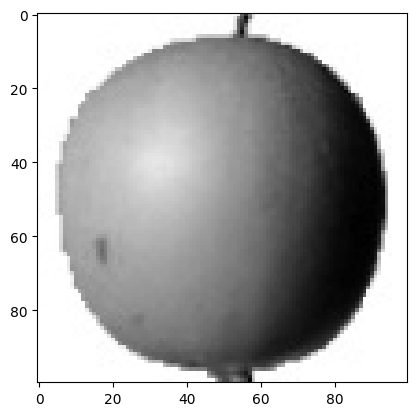

In [5]:
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

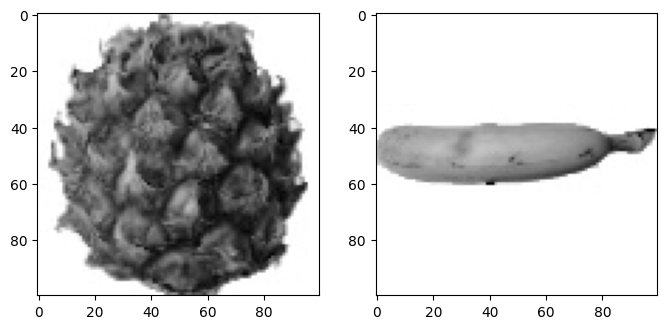

In [6]:
fig,axe = plt.subplots(1,2,figsize=(8,4))
axe[0].imshow(fruits[100],cmap='gray_r')
axe[1].imshow(fruits[200],cmap='gray_r')
plt.show()

In [7]:
# 2차원 배열을 -> 1차원 배열로
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

apple.shape

(100, 10000)

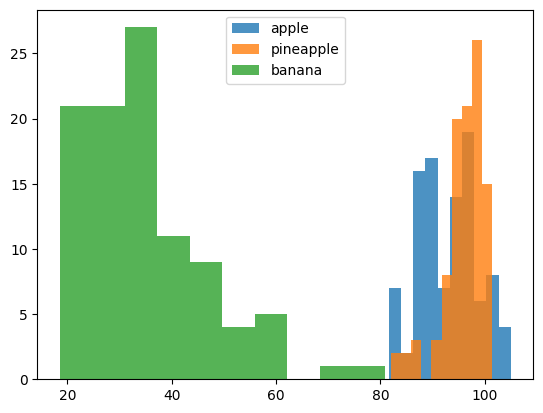

In [8]:
plt.hist(np.mean(apple,axis=1),alpha=0.8,label='apple')
plt.hist(np.mean(pineapple,axis=1),alpha=0.8,label='pineapple')
plt.hist(np.mean(banana,axis=1),alpha=0.8,label='banana')
plt.legend()
plt.show()

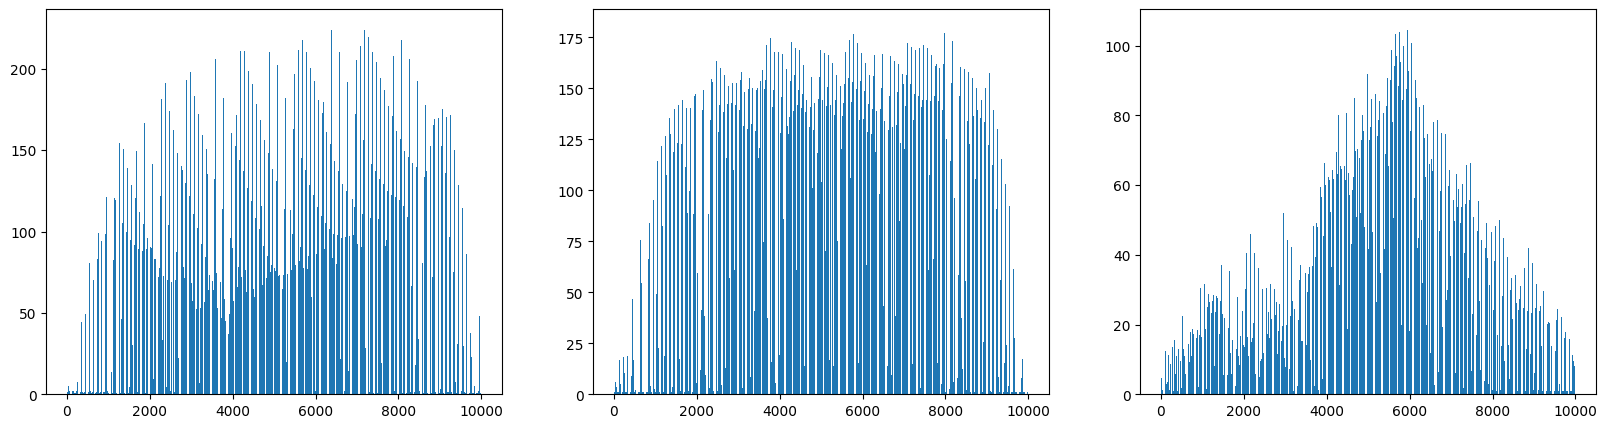

In [9]:
fig,axe = plt.subplots(1,3,figsize=(20,5))
axe[0].bar(range(10000),np.mean(apple,axis=0))
axe[1].bar(range(10000),np.mean(pineapple,axis=0))
axe[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

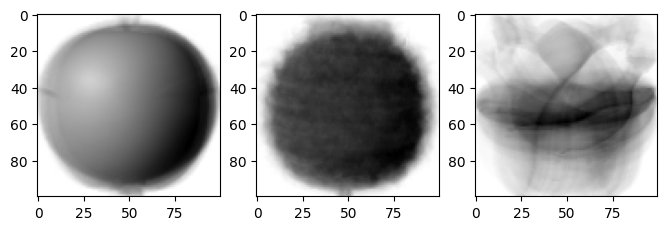

In [10]:
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

fig,axs = plt.subplots(1,3,figsize=(8,4))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

In [11]:
apple_mean.shape
# 100행 100열 100 X 100


(100, 100)

In [12]:
abs_diff = np.abs(fruits-apple_mean)
abs_mean = np.mean(abs_diff,axis=(1,2))
abs_mean.shape
# 300개의 1차원 배열

(300,)

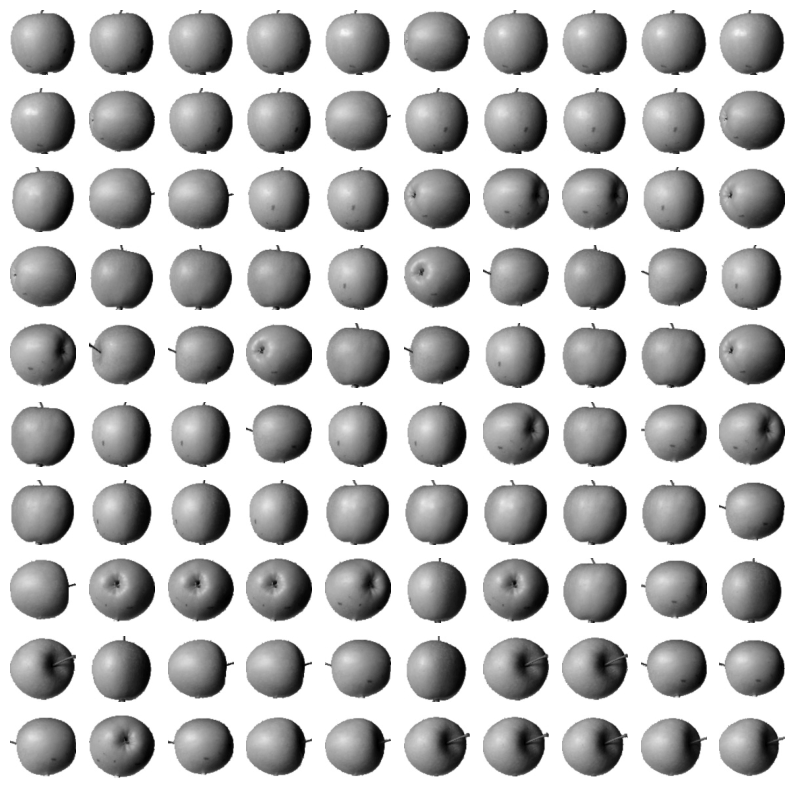

In [15]:
apple_index = np.argsort(abs_mean)[:100]
fig,axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10) :
    for j in range(10) :
        axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

In [14]:
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42],
      dtype=int64)

In [16]:
fruits.shape

(300, 100, 100)

In [18]:
fruits_2d = fruits.reshape(-1,100*100)

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,random_state=42)
# 하이퍼파라미터로 클러스터 개수를 지정
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [23]:
km.labels_
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([112,  98,  90], dtype=int64))


In [35]:
def draw_friuts(arr,ratio=1) :
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig , axs = plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

    for i in range(rows) :
        for j in range(cols) :
            if i*10+j < n :
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

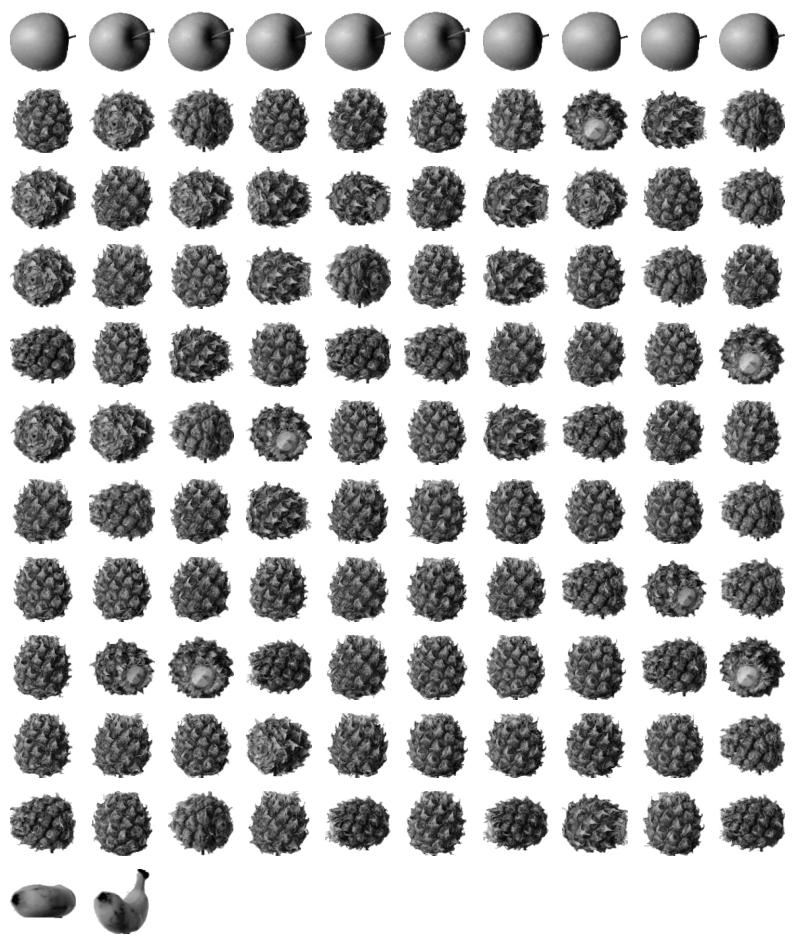

In [36]:
draw_friuts(fruits[km.labels_==0])

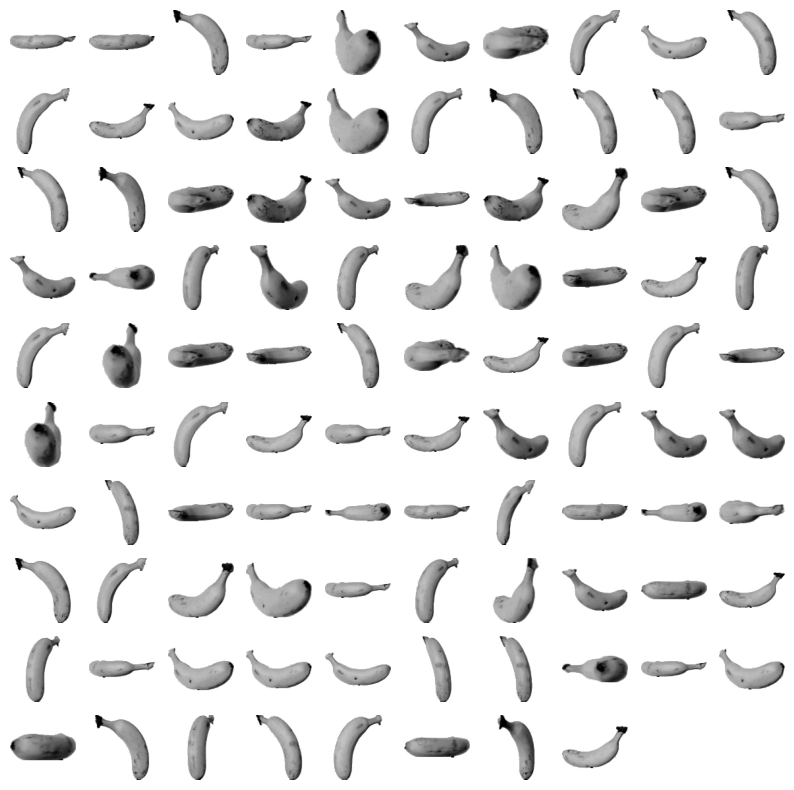

In [37]:
draw_friuts(fruits[km.labels_==1])

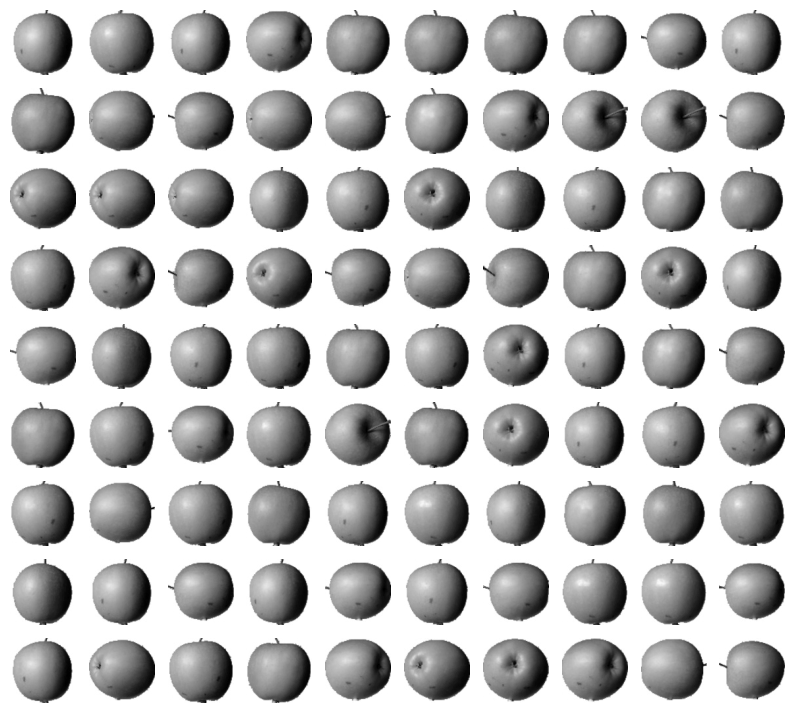

In [38]:
draw_friuts(fruits[km.labels_==2])

In [39]:
arr = np.arange(20)  # 예를 들어, 0부터 19까지 숫자를 담은 배열이 있다고 가정
for i in range(2):  # 2개의 행
    for j in range(10):  # 10개의 열
        print(f"행 {i}, 열 {j}, 배열 인덱스: {i*10 + j}")


행 0, 열 0, 배열 인덱스: 0
행 0, 열 1, 배열 인덱스: 1
행 0, 열 2, 배열 인덱스: 2
행 0, 열 3, 배열 인덱스: 3
행 0, 열 4, 배열 인덱스: 4
행 0, 열 5, 배열 인덱스: 5
행 0, 열 6, 배열 인덱스: 6
행 0, 열 7, 배열 인덱스: 7
행 0, 열 8, 배열 인덱스: 8
행 0, 열 9, 배열 인덱스: 9
행 1, 열 0, 배열 인덱스: 10
행 1, 열 1, 배열 인덱스: 11
행 1, 열 2, 배열 인덱스: 12
행 1, 열 3, 배열 인덱스: 13
행 1, 열 4, 배열 인덱스: 14
행 1, 열 5, 배열 인덱스: 15
행 1, 열 6, 배열 인덱스: 16
행 1, 열 7, 배열 인덱스: 17
행 1, 열 8, 배열 인덱스: 18
행 1, 열 9, 배열 인덱스: 19


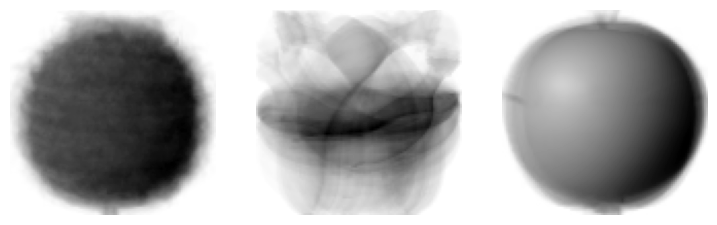

In [43]:
draw_friuts(km.cluster_centers_.reshape(-1,100,100),ratio=3)

In [44]:
km.transform(fruits_2d[100:101])

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [45]:
km.predict(fruits_2d[100:101])

array([0])

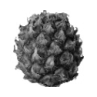

In [47]:
draw_friuts(fruits[100:101])

In [48]:
km.n_iter_

4

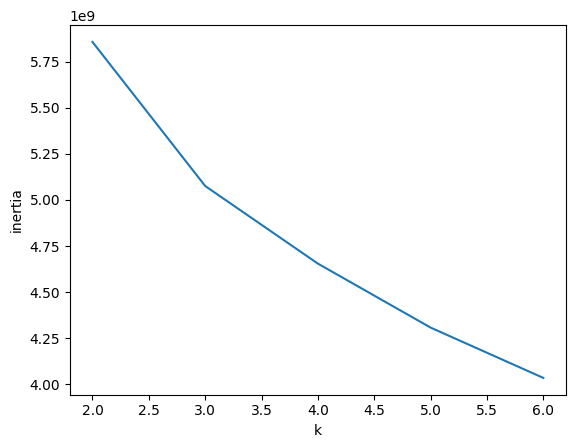

In [53]:
# 최적의 k 찾기

inertia = []
for i in range(2,7):
    kn = KMeans(n_clusters=i,random_state=42)
    kn.fit(fruits_2d)
    inertia.append(kn.inertia_)

plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [57]:
pca.components_.shape

(50, 10000)

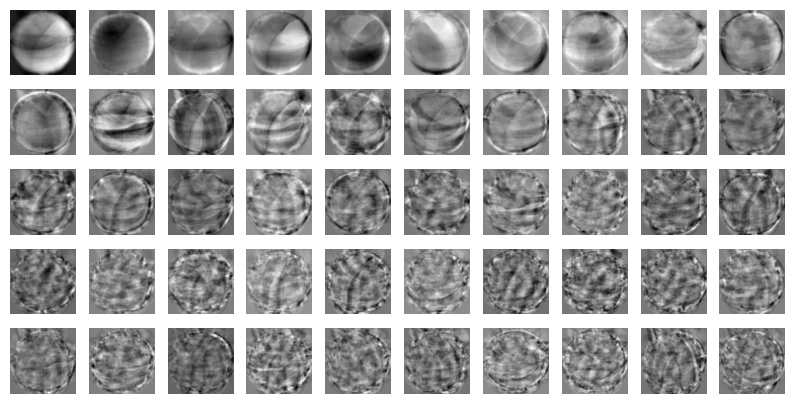

In [58]:
draw_friuts(pca.components_.reshape(-1,100,100))

In [60]:
fruits_2d.shape

(300, 10000)

In [61]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [63]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

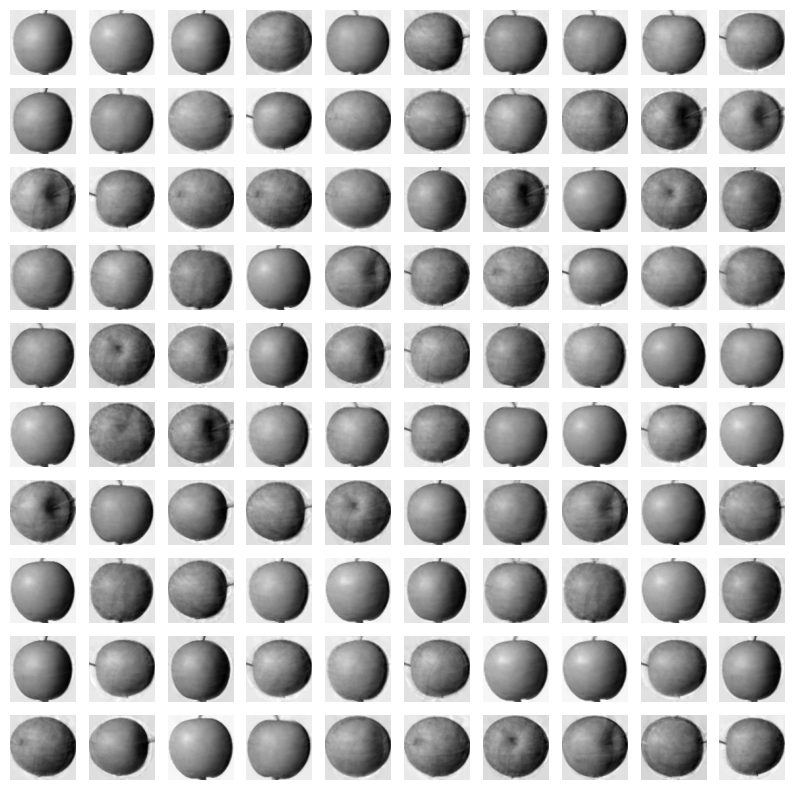

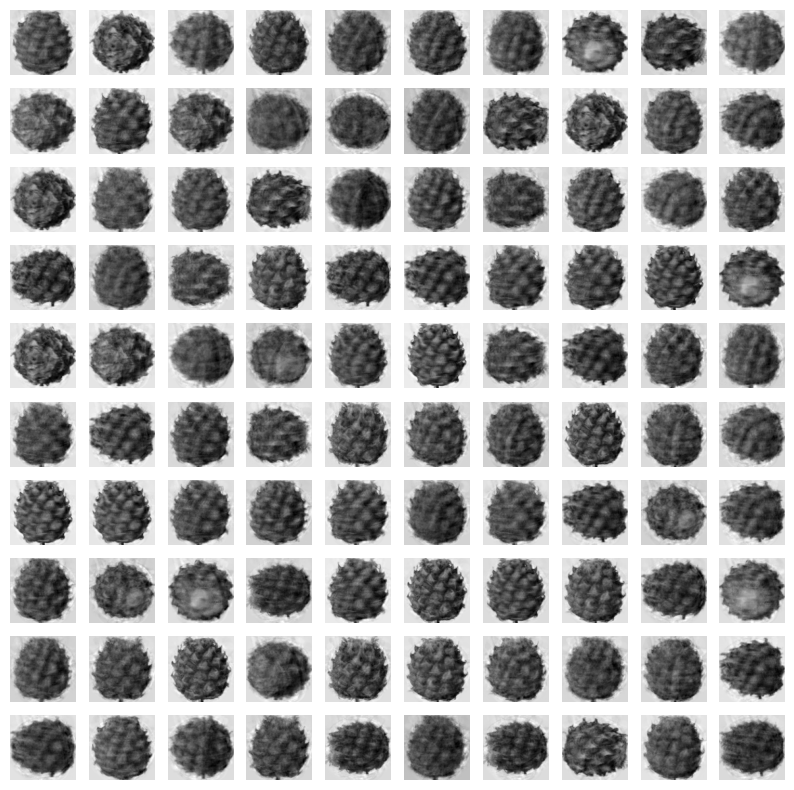

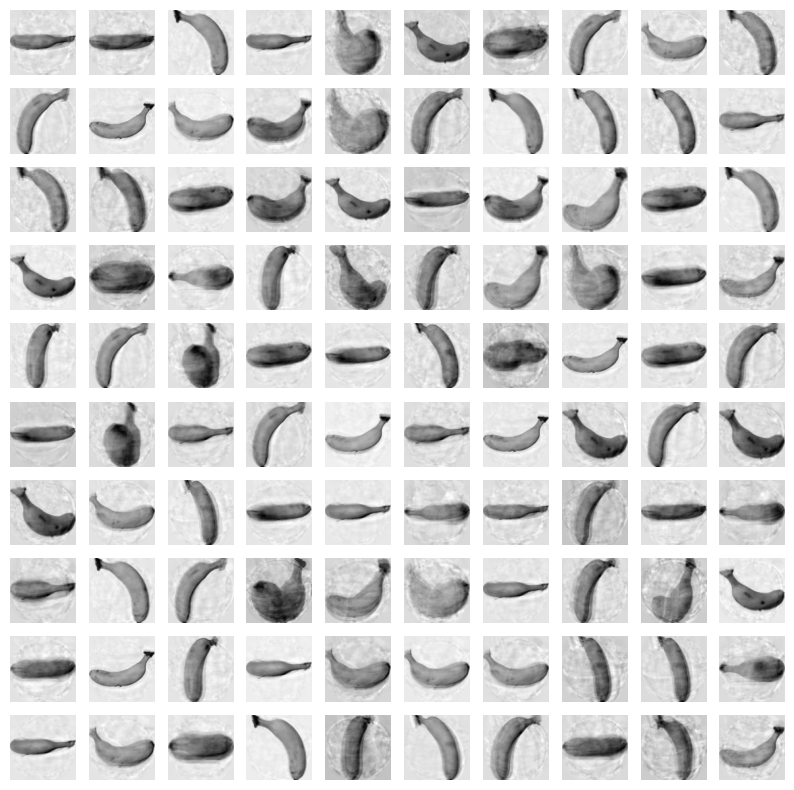

In [64]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for i in [0,100,200] :
    draw_friuts(fruits_reconstruct[i:i+100])
    plt.show()

설명된 분산 (explained_variance_ratio_)

In [65]:
np.sum(pca.explained_variance_ratio_)

0.9215780063317407

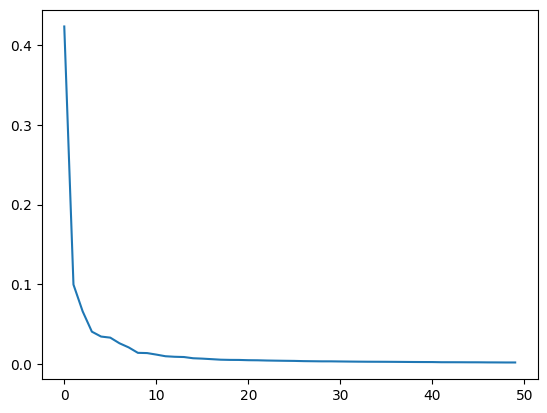

In [66]:
plt.plot(pca.explained_variance_ratio_)

로지스틱 회귀랑 같이 사용해보기

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
target = np.array([0]*100+[1]*100+[2]*100)

scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.30469727516174316


In [69]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.007221221923828125


In [70]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [71]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [73]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.012627363204956055


C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

군집과 함께 사용하기

In [74]:
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [75]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))

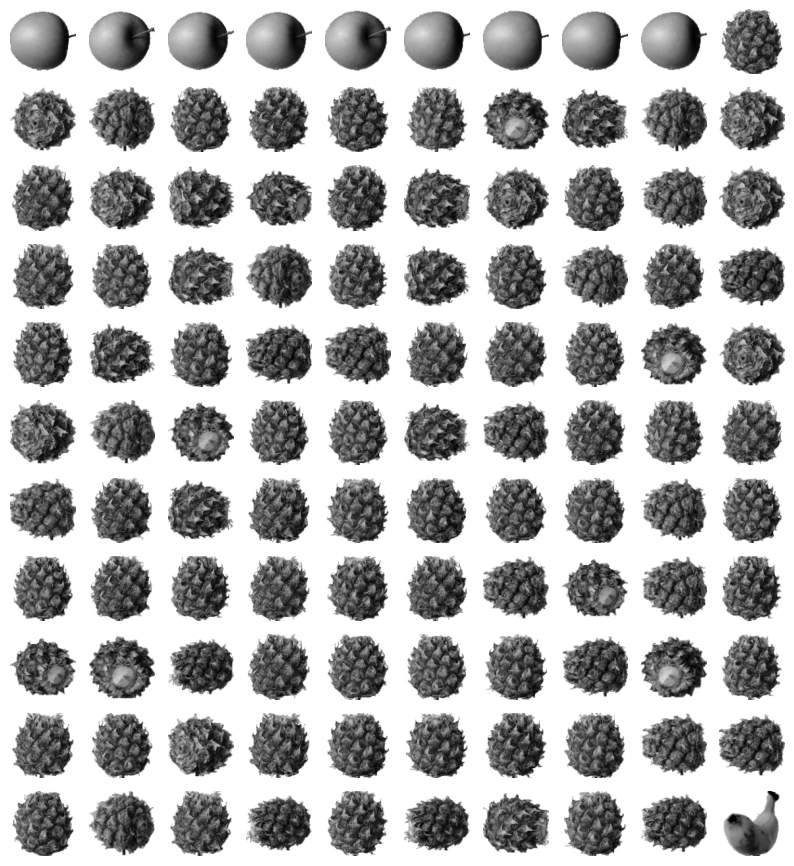

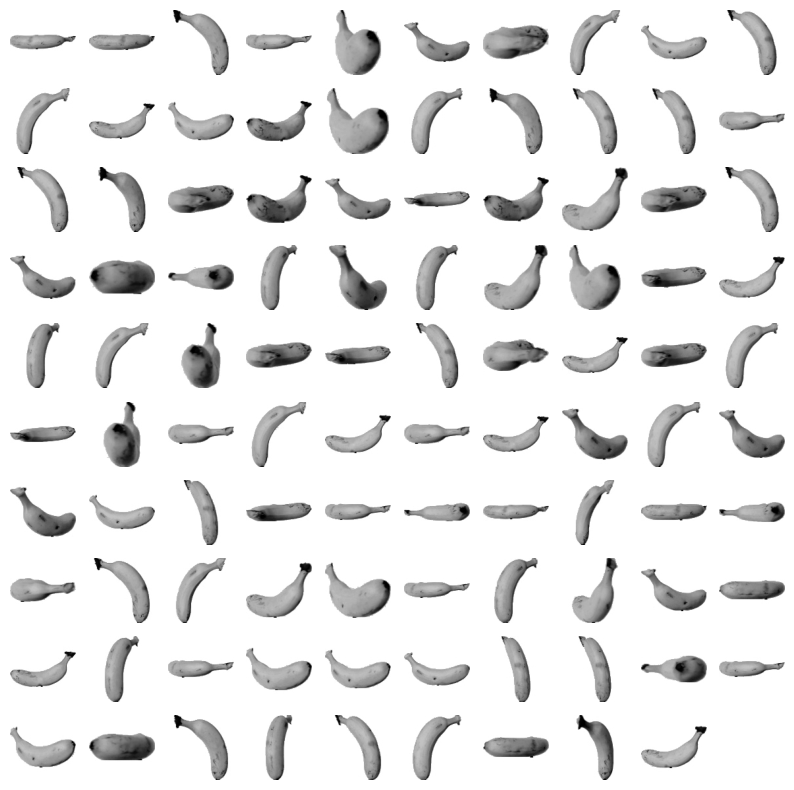

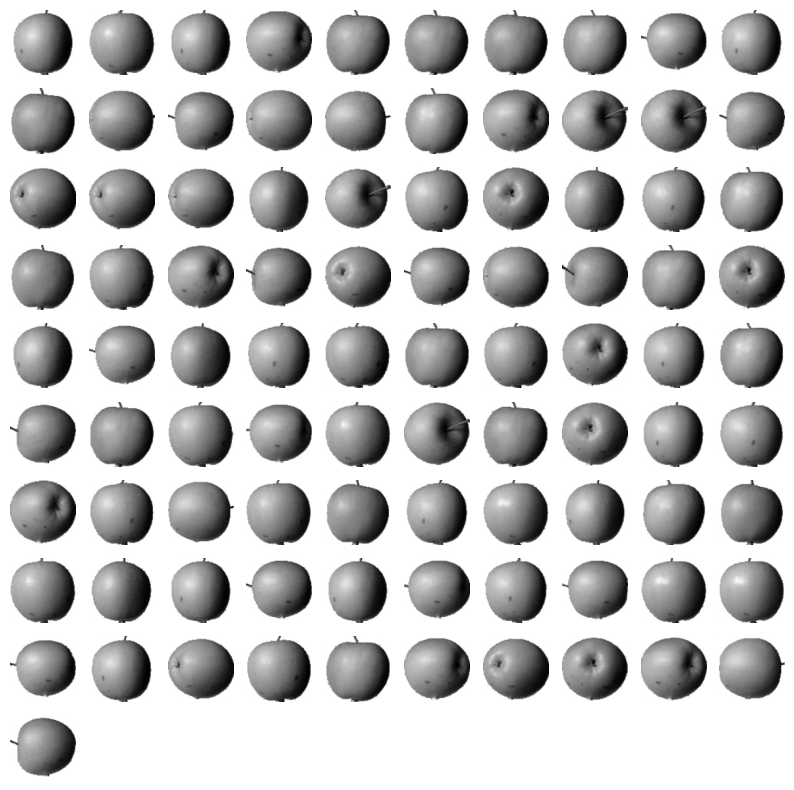

In [81]:
for i in range(0,3) :
    draw_friuts(fruits[km.labels_==i])

In [82]:
fruits_pca

array([[-2778.41779459, -1571.87380954],
       [-3078.27365136, -2739.27040962],
       [-2620.61072939, -1486.87055253],
       [-3113.71771062, -2530.02283015],
       [-2520.64705144, -2330.64791173],
       [-1556.73860341,   123.05166122],
       [-2711.38755162, -1857.35297386],
       [-2884.74283654, -1836.15286362],
       [-2310.99240338, -2660.46264957],
       [-1521.26665012, -2445.37438374],
       [-2486.91643797, -1475.55043726],
       [-2800.83912843, -2001.07115818],
       [-2810.56248913, -2034.36322556],
       [-2209.09841637, -2303.76592225],
       [-2917.38810303, -2438.42530884],
       [-2198.1718942 ,  -636.80184589],
       [-2317.61818126, -2704.80151487],
       [-3289.84664277, -2436.3934378 ],
       [-2641.95018377,   503.74908687],
       [-3563.8760831 , -1290.01167006],
       [-3708.64597097, -1575.33617706],
       [-2423.96625858, -2080.63343889],
       [-3169.13983546, -2238.74224157],
       [-3059.33441459, -2250.14899831],
       [-2745.82

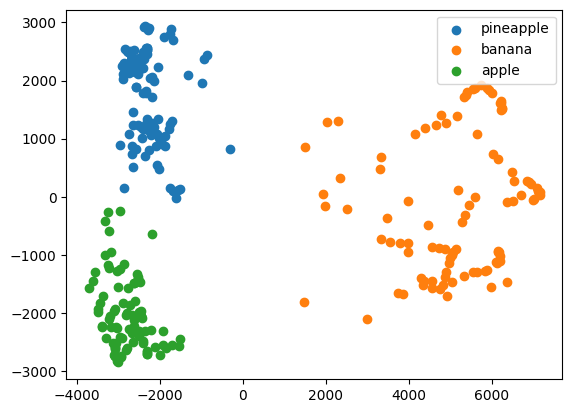

In [83]:
for label in range(0,3) :
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()